# Datos perdidos o faltantes en las tablas, trabajo con R

## Referencias
Buuren, Stef van. 2018. Flexible Imputation of Missing Data. 2nd ed. Chapman & Hall/CRC. https://stefvanbuuren.name/fimd/.
Efromovich, Sam. 2018. Missing and Modified Data in Nonparametric Estimation. 1st ed. Boca Raton, Florida: CRC Press.
Gelman, Andrew. 2006. Data Analysis Using Regression and Multilevel/Hierarchical Models. 1st ed. Cambridge University Press.
Kowarik, Alexander, and Matthias Templ. 2016. “Imputation with the R Package VIM.” Journal of Statistical Software 74 (7): 1–16. https://doi.org/10.18637/jss.v074.i07.
Molenberghs, Geert. 2015. Handbook of Missing Data Methodology. 1st ed. Chapman & Hall/CRC Press.
Raghunathan, Trivellore. 2016. Missing Data Analysis in Practice. 1st ed. Chapman & Hall/CRC.
Schafer, Joseph L., and John W. Graham. 2002. “Missing Data: Our View of the State of the Art.” Psychological Methods 7 (2): 147–77. https://doi.org/10.1037/1082-989x.7.2.147.
van Buuren, Stef, and Karin Groothuis-Oudshoorn. 2011. “mice: Multivariate Imputation by Chained Equations in r.” Journal of Statistical Software 45 (3): 1–67. https://www.jstatsoft.org/v45/i03/.
Wiley, Matt, and Joshua F. Wiley. 2019. Advanced r Statistical Programming and Data Models. 1st ed. APress.

Primero cargarermos las librerías necesiarias, y un conjunto de datos presente en R:

In [149]:
install.packages("pastecs")
install.packages("tidyverse")
#install.packages("summarytools")
install.packages("DataExplorer")
install.packages("mice")
library(mice)
#library(summarytools)
library(DataExplorer)
library(tidyverse)
library(pastecs)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Datos faltantes

#### Una de las principales tareas para el análisis de datos suele ser la evaluación de la inexistencia de datos (datos faltantes o “missing data”).
#### En R la ausencia de valores se representa por el valor “NA” lo que permite su reconocimiento y consideración en el uso de funciones sobre datos. Las tareas consisten pues en:

* Evaluar la existencia de valores perdidos (exploración).
* Excluir los valores ausentes.
* Recodificar los valores ausentes (imputación).

#### Las acciones que pueden llevarse a cabo frente a datos ausentes son por tanto, las que pueden o no modificar el comportamiento de los datos en su totalidad o llevar a conclusiones erróneas:

* Eliminar las filas completas que contengan al menos un valor ausente.
* Eliminar las filas que contengasn datos ausntes en alguna variable considerada clave para el análisis.
* Cambiar los valores ausentes a otro valor.
* Modificar los valores ausentes a un valor predeterminado.
* Realizar imputación de datos.

# El problema de la ausencia

In [150]:
# La ausencia de datos en un set de datos provoca errores:
mean(airquality$Ozone)

[1] NA

In [151]:
# A menos que dentro de la función se pueda especificar omitir este tipo de datos:
mean(airquality$Ozone, na.rm = TRUE)

[1] 42.12931

# Clasificación de datos

### Se identifican 3 mecanismos que establecen datos ausentes:

1. MCAR
Missing Completely at Random. Si la probabilidad de estar ausentes es la misma en todos los casos, entonces se dice que poseen datos perdidos en forma completamente aleatoria. Este es el estado deseado en caso de datos perdidos, ya que indica que no hay sesgo respecto de las pérdidas. Por tanto se mantendrían las medidas de normalidad y distribución estadística. La pérdida de datos no esta relacionada a los datos mismos. Al capturar datos de una muestra los datos no ingresados en ella son evitados en forma MCAR (totalmente aleatoria, cuando el muestreo es correcto).

2. MAR
Missing at Random. Existe una relación sistemática entre los datos observados y la propensión a valores ausentes. Que una observación falte no tiene que ver con esos valores, sino con los valores de las variables observadas. Un ejemplo claro es la edad, que es más probable que los hombres la digan respecto de las mujeres. Entonces la edad es MAR.
La ausencia de datos está sesgada ya que no tienen la misma distribución, en el ejemplo anterior, las respuestas ausentes provienen mayoritariamente de mujeres. También puede originarse de una mala muestra de datos (no representativa o sesgada).

3. MNAR
Missing Not at Random. Pérdida de datos no aleatoria. Existe una relación entre la propensión a que falte un dato y sus valores. Esto origina un problema en el análisis de datos. Como ejemplo si la mayoría no responde una pregunta determinada puede deberse a que esa pregunta no se entendió del todo.
En una encuesta pública, las personas con carácter más tímido responderán con menos frecuencia que otras de caracter más fuerte.

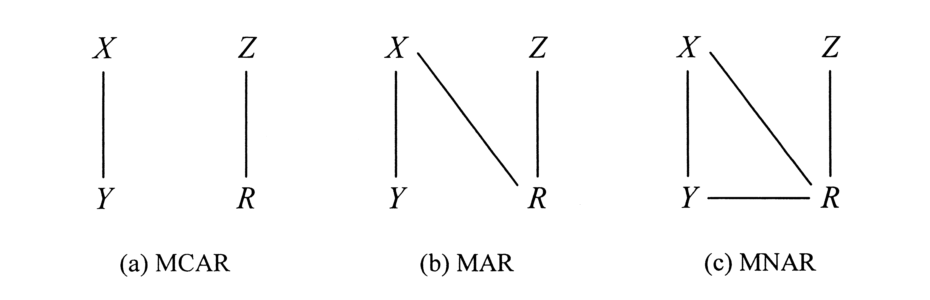
### Representación gráfica de ausencias.
X representa las variables observadas, Y representa una variable parcialmente ausente, Z representa el componente de las causas de ausencia no relacionadas con X e Y, y R representa la ausencia. (Schafer and Graham 2002).

# **Análisis visual de nuestros datos**

Vamos a comenzar con un análisis visual de nuestras variables.

**airquality:** Mediciones diarias de la calidad del aire en Nueva York, de mayo a septiembre de 1973.

Lecturas diarias de los siguientes valores de calidad del aire para el 1 de mayo de 1973 (a martes) al 30 de septiembre de 1973.

**Variables:**

* Ozone: Ozono medio en partes por mil millones de 1300 a 1500 horas en Roosevelt Island

* Solar.R:Radiación solar en Langleys en la banda de frecuencia 4000--7700 Angstroms de 0800 a 1200 horas en Central Park

* Wind: Velocidad media del viento en millas por hora a las 0700 y 1000 horas en el aeropuerto de LaGuardia

* Temp: Máximo diario temperatura en grados Fahrenheit en el aeropuerto de La Guardia.

¿Hay valores perdidos?

In [152]:
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [153]:
dim(airquality)

[1] 153   6

In [154]:
#tipos de variable
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


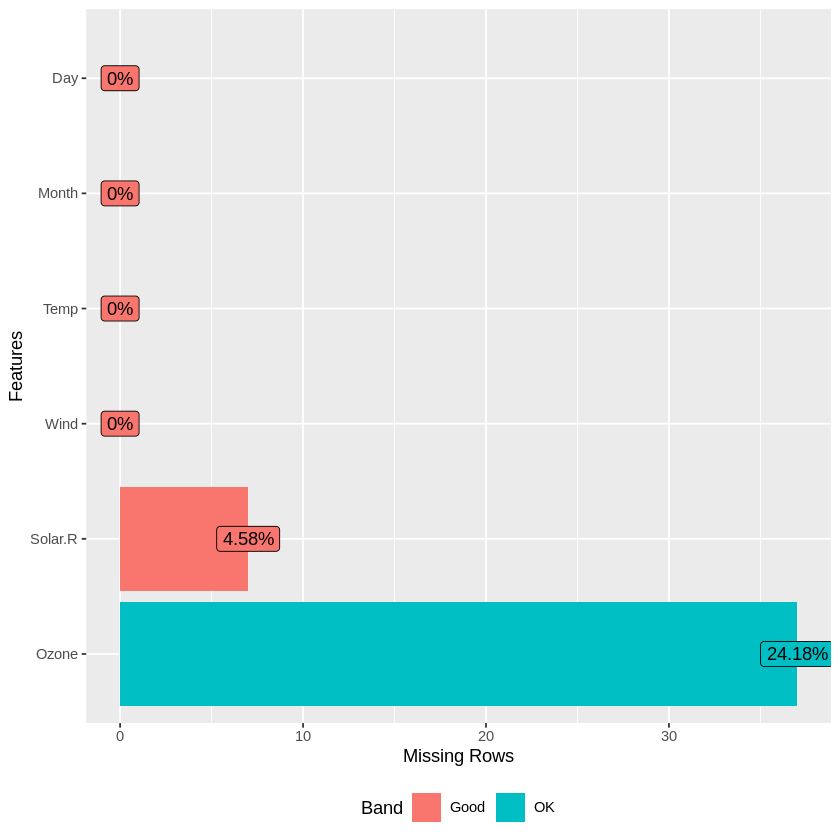

In [155]:
library(pastecs)
#library(summarytools)
library(DataExplorer)

plot_missing(airquality) #datos perdidos por variable

# Con un histograma y diagrama de densidades para cada una de nuestras variables cuantitativas. Podemos hacernos una primera idea de la distribución de nuestros datos.

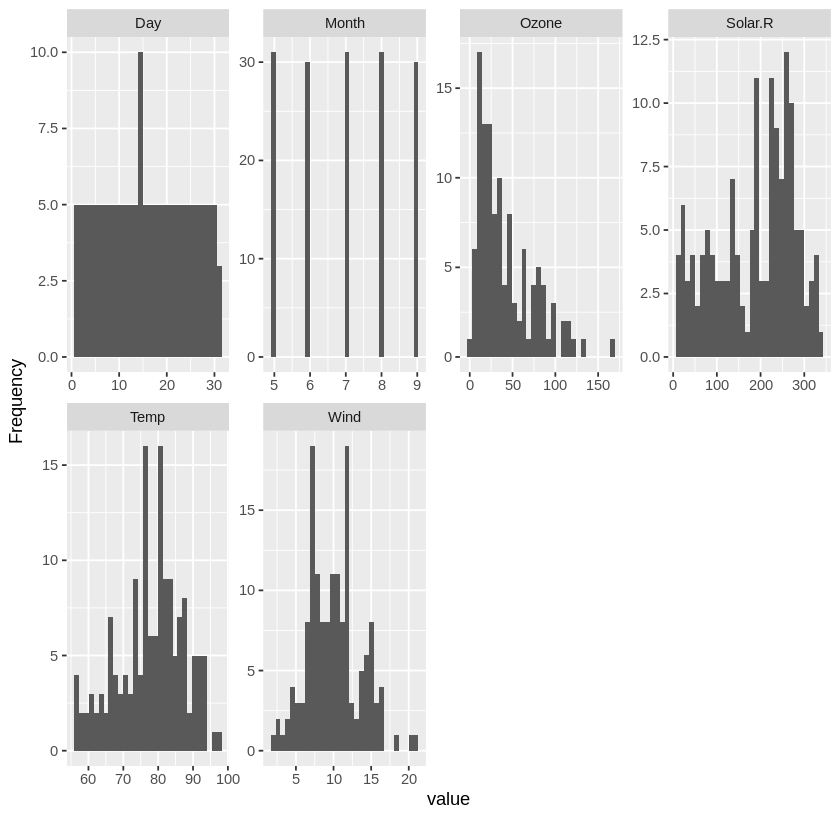

In [156]:
plot_histogram(airquality)

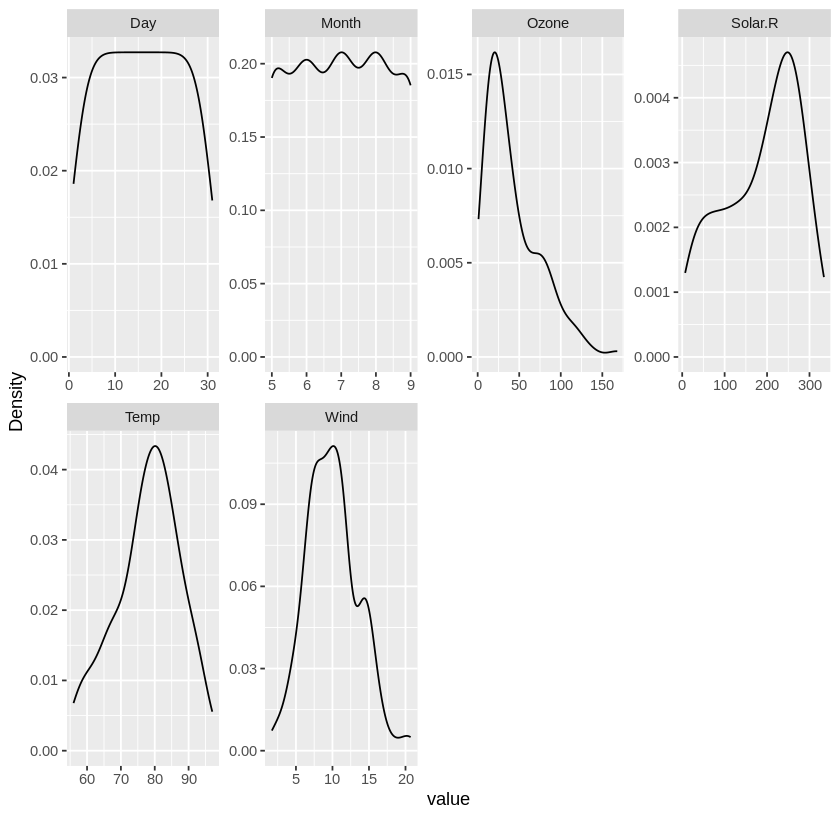

In [157]:
plot_density(airquality)

# ¿Se correlacionan nuestras variables? Esto es importante a la hora por ejemplo de realizar un análisis multivariantes o a la hora de seleccionar las variables más influyentes.

Warning message:
“Removed 18 rows containing missing values (`geom_text()`).”


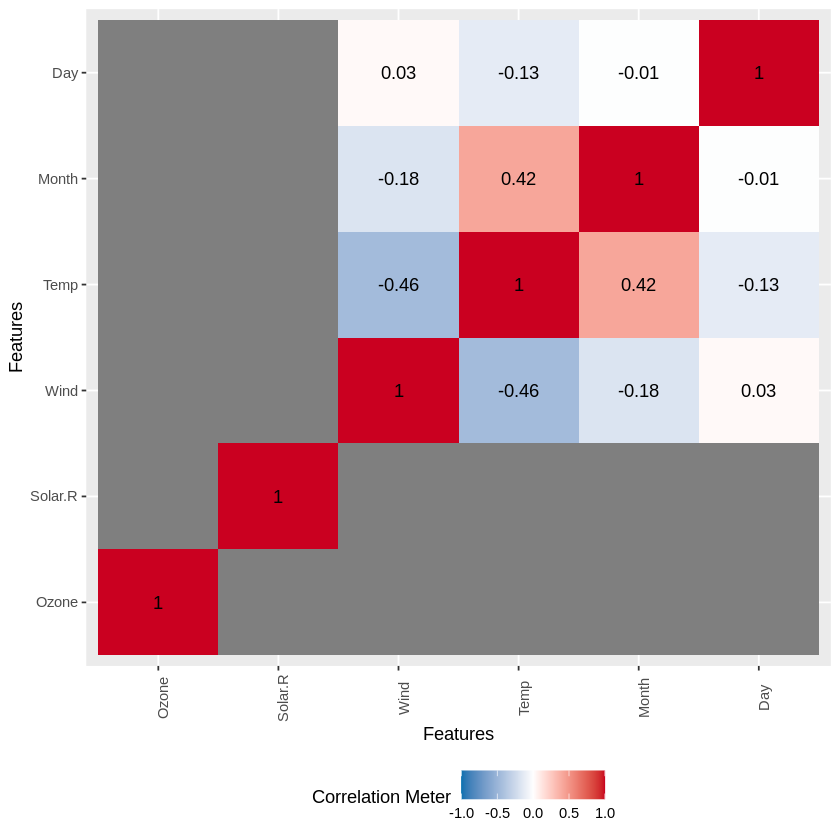

In [158]:
plot_correlation(airquality, type = 'continuous','Review.Date')

Vemos que para las variables con valores perdidos no se ha hecho la correlación. Los colores más intensos muestran una mayor correlación entre las variables.

Para las variables categóricas utilizamos plot_bar:

In [159]:
# Ejemplo: plot_bar(airquality)

# Análisis cuantitativo de nuestros datos
Vamos a comenzar con un análisis cuantitativo de nuestras variables. ¿Cuál es la media de cada variables? ¿su valor máximo? ¿el número de casos? etc.

In [160]:
stat.desc(airquality)

# Otra forma similar de hacer la tabla anterior: summarytools::descr(datas)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,116.0000000,1.460000e+02,153.0000000,1.530000e+02,153.0000000,153.0000000
nbr.null,0.0000000,0.000000e+00,0.0000000,0.000000e+00,0.0000000,0.0000000
nbr.na,37.0000000,7.000000e+00,0.0000000,0.000000e+00,0.0000000,0.0000000
min,1.0000000,7.000000e+00,1.7000000,5.600000e+01,5.0000000,1.0000000
max,168.0000000,3.340000e+02,20.7000000,9.700000e+01,9.0000000,31.0000000
range,167.0000000,3.270000e+02,19.0000000,4.100000e+01,4.0000000,30.0000000
sum,4887.0000000,2.714600e+04,1523.5000000,1.191600e+04,1070.0000000,2418.0000000
median,31.5000000,2.050000e+02,9.7000000,7.900000e+01,7.0000000,16.0000000
mean,42.1293103,1.859315e+02,9.9575163,7.788235e+01,6.9934641,15.8039216


# Resumen
Cono todo lo anterior nos podemos hacer una primera idea de como son nuestros datos y los posible errores en los mismos. También tenemos una primera idea de sus distribuciones (por medio de los histogramas) y de los valores perdidos o los posibles outliers. Sin este trabajo previo no debemos realizar un análisis estadístico, ya que desconocemos la naturaleza de nuestras variables y su posible interpretación.

# Exploración
La primera misión de un analista es determinar la existencia de valores ausentes, y determinar posteriormente, las acciones a tomar frente a ello.

Como siempre en R, hay más de una forma de obtener los resultados esperados.

Para determinar el patrón de datos hacemos uso de la librería **mice**.

,Wind,Temp,Month,Day,Solar.R,Ozone,
111,1,1,1,1,1,1,0
35,1,1,1,1,1,0,1
5,1,1,1,1,0,1,1
2,1,1,1,1,0,0,2
,0,0,0,0,7,37,44


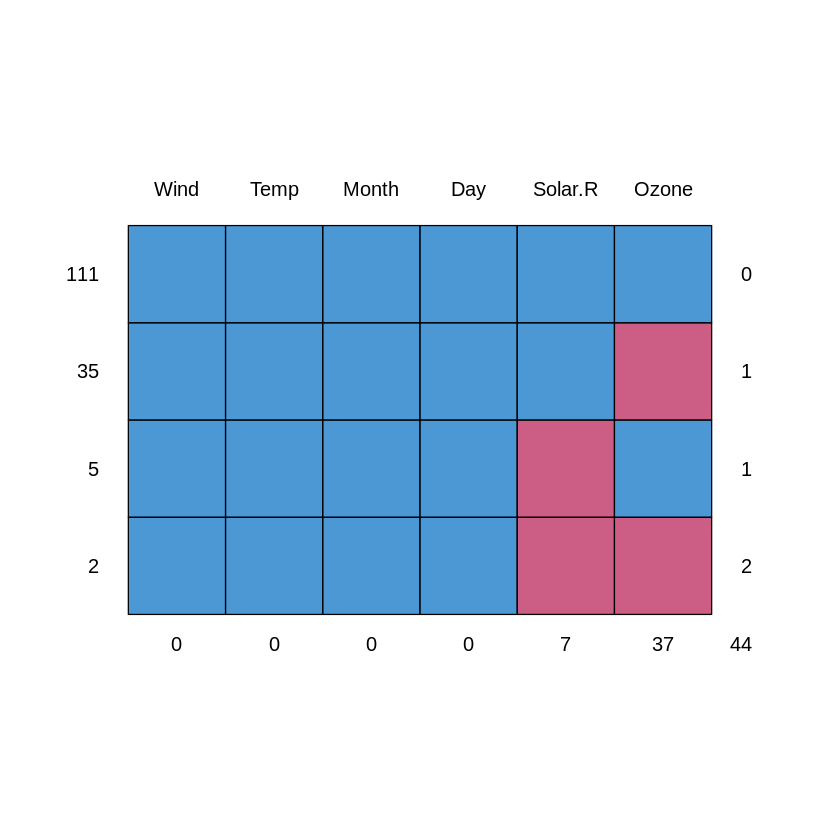

In [161]:
library(mice)
md.pattern(airquality)

**Interpretación:**

* La columna "Wind" tiene datos completos en todos los patrones (todos los valores son 0), lo que significa que no faltan datos para esta variable en ningún registro.

* La columna "Temp" también tiene datos completos en todos los patrones.

* La columna "Month" tiene datos completos en todos los patrones.

* La columna "Day" tiene datos completos en todos los patrones.

* La columna "Solar.R" tiene valores faltantes en algunos patrones. En la última fila, todos los valores de "Solar.R" son 7, lo que significa que los valores de esta columna están presentes en todos los registros, excepto en el último.

* La columna "Ozone" tiene valores faltantes en algunos patrones. En la última fila, todos los valores de "Ozone" son 37 y 44, lo que significa que los valores de esta columna están presentes en todos los registros, excepto en el último.

## Primero determinamos si una columna en particular contiene NAs mediante "is.na"

In [162]:
sum(is.na(airquality$Solar.R))

[1] 7

In [163]:
sum(is.na(airquality$Ozone))

[1] 37

In [164]:
sum(is.na(airquality$Wind))

[1] 0

## Lo usual es verificar la existencia de casos donde existan valores ausentes. Si desea aplicar una función solamente con aquellos casos con todos sus valores existe la función **complete()**.

In [165]:
# mostrar solo aquellos registros que no estan completos (poseen algún valor ausente)
# la columna Ozone posee NA's

airquality %>%
  select(Ozone, Solar.R, Wind, Temp) %>%
  filter(!complete.cases(.))

# En este ejemplo filter () sólo deja las filas que contienen NAs (elimina las otras)

Ozone,Solar.R,Wind,Temp
<int>,<int>,<dbl>,<int>
NA,NA,14.3,56
28,NA,14.9,66
NA,194,8.6,69
7,NA,6.9,74
NA,66,16.6,57
NA,266,14.9,58
NA,NA,8.0,57
NA,286,8.6,78
NA,287,9.7,74


## El número de valores ausentes por cada variable es:

In [166]:
colSums(is.na(airquality))

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

# Valoración de datos perdidos

El umbral predeterminado para tolerar datos perdidos suele ser de un 5% para grandes volumenes de datos. Si el porcentaje es mucho mayor, tal vez se deba omitir esa propiedad, o en su defecto considerar realizar imputación de datos.

In [167]:
# determinación del porcentaje de valores perdidos respecto del total de datos para cada columna:

porcentajeMiss <- function(x) {sum(is.na(x)) / length(x)*100}

# por columnas:

apply(airquality, 2, porcentajeMiss)

Ozone   Solar.R      Wind      Temp     Month       Day 
24.183007  4.575163  0.000000  0.000000  0.000000  0.000000

La columna “Ozone” tiene cerca de un 25% de datos perdidos, por tanto no debería considerarse para mediciones futuras.

In [168]:
# por filas:

apply(airquality, 1, porcentajeMiss)

[1]  0.00000  0.00000  0.00000  0.00000 33.33333 16.66667  0.00000  0.00000
  [9]  0.00000 16.66667 16.66667  0.00000  0.00000  0.00000  0.00000  0.00000
 [17]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
 [25] 16.66667 16.66667 33.33333  0.00000  0.00000  0.00000  0.00000 16.66667
 [33] 16.66667 16.66667 16.66667 16.66667 16.66667  0.00000 16.66667  0.00000
 [41]  0.00000 16.66667 16.66667  0.00000 16.66667 16.66667  0.00000  0.00000
 [49]  0.00000  0.00000  0.00000 16.66667 16.66667 16.66667 16.66667 16.66667
 [57] 16.66667 16.66667 16.66667 16.66667 16.66667  0.00000  0.00000  0.00000
 [65] 16.66667  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 16.66667
 [73]  0.00000  0.00000 16.66667  0.00000  0.00000  0.00000  0.00000  0.00000
 [81]  0.00000  0.00000 16.66667 16.66667  0.00000  0.00000  0.00000  0.00000
 [89]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 16.66667
 [97] 16.66667 16.66667  0.00000  0.00000  0.00000 16.66667 16.66667  0.00000
[105]  0.00000  0.00000 16.66667  0.00000  0.00000  0.00000  0.00000  0.00000
[113]  0.00000  0.00000 16.66667  0.00000  0.00000  0.00000 16.66667  0.00000
[121]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
[129]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
[137]  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000
[145]  0.00000  0.00000  0.00000  0.00000  0.00000 16.66667  0.00000  0.00000
[153]  0.00000

# Determinar que valores deben ser cambiados por NA.
No basta con la búsqueda de valores vacíos o nulos, que rápidamente se pueden detectar y cambiar por NA para ser incorporados dentro de las acciones de funciones (mediante omisión de valores NA).

# ¿Cómo detectar qué valores no son correctos y por tanto deben ser cambiados/omitidos?

La primera opción debiera ser revisar esos valores en detalle, lo que es posible solamente cuando tenemos tal vez unos cientos de valores únicos. Es extremadamente dificil y costoso cuando son miles de variantes.

In [169]:
# contabilidad de datos únicos en cada columna

airquality %>% summarise_all(funs(n_distinct(.)))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<int>,<int>,<int>,<int>
68,118,31,40,5,31


# Determinar los valores existentes en cada columna del set de datos:

In [170]:
unique(airquality$Ozone)

[1]  41  36  12  18  NA  28  23  19   8   7  16  11  14  34   6  30   1   4  32
[20]  45 115  37  29  71  39  21  20  13 135  49  64  40  77  97  85  10  27  48
[39]  35  61  79  63  80 108  52  82  50  59   9  78  66 122  89 110  44  65  22
[58]  31 168  73  76 118  84  96  91  47  24  46

In [171]:
unique(airquality$Wind)

[1]  7.4  8.0 12.6 11.5 14.3 14.9  8.6 13.8 20.1  6.9  9.7  9.2 10.9 13.2 12.0
[16] 18.4 16.6  5.7 16.1 20.7 10.3  6.3  1.7  4.6  4.1  5.1  4.0 15.5  3.4  2.3
[31]  2.8

# Reemplazar valores nulos u otros a “NA”

En muchas ocasiones tendremos en lugar de valores normales NA, valores vacíos del tipo "" o de otro tipo indicando errores. Para tratarlos correctamente en R deben ser cambiados a NA, que si es reconocido como un valor.

In [172]:
# modifica aquellos valores vacíos por NA.
airquality$Ozone[airquality$Ozone == ""] <- NA

airquality$Ozone[airquality$Ozone == 0] <- NA

# modifica una columna de factores para agregar un NA
# pacientes$sexo <- factor(pacientes$sexo, levels = c("M", "F", NA))

# Reemplazar los valores ausentes por otro valor:

In [173]:
# datos <- read.csv(file="",
#          sep = ",", dec = ".",
#          na.strings = "")

# esto reemplazará los espacios en blancos por 'NA'

In [174]:
# altera los valores NA y los cambia por "0"

# airquality %>%
  # select(Ozone, Wind, Temp) %>%
  # "replace_na"  reemplaza los NA por "0" en Ozone
  # mutate(Ozone = replace_na(Ozone, "0")) %>%
  # no contabiliza los NA en columna Ozone, pero como se modificaron por "0", mostrará todos los registros (153)
  # drop_na(Ozone)

# Tambien se puede buscar valores vacíos con is.empty()

Reemplazar ciertos valores (“0” en este caso) por NA es relevante para detectar valores sin sentido.

In [175]:
# Reemplaza los valores "0" en Ozone por NA.
airquality %>%
  select(Ozone, Wind, Temp, Solar.R) %>%
  # efectua el reemplazo de los valores '0' por NA
  mutate(Ozone = na_if(Ozone, 0)) %>%
  # filtrar para mostrar solamente los que posean valor NA en Ozone
  filter(is.na(Ozone)) %>%
  View() # cambiar por: head()

Ozone,Wind,Temp,Solar.R
<int>,<dbl>,<int>,<int>
NA,14.3,56,NA
NA,8.6,69,194
NA,16.6,57,66
NA,14.9,58,266
NA,8.0,57,NA
NA,8.6,78,286
NA,9.7,74,287
NA,16.1,67,242
NA,9.2,84,186


# Trabajar con funciones que permiten omitir valores NA.

In [176]:
# incidencia de valores NA en el cálculo de algunas funciones.
# la primera indicará un error por contener valores NA

mean(airquality$Ozone)

[1] NA

In [177]:
# al omitir los valores NA presentará el valor correcto

mean(airquality$Ozone, na.rm = TRUE)

[1] 42.12931

# **is.na()**
Es la función más sencilla para evaluar los valores ausentes, ya que presenta un valor lógico de TRUE si existe un valor ausente en una fila (funciona en vector, lista, matrices y data frame).

In [178]:
is.na(airquality) %>%
  head()

Ozone,Solar.R,Wind,Temp,Month,Day
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [179]:
# Otra forma de evaluar cuantos NA hay en cada columna de un data frame es:

colSums(is.na(airquality))

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

# **na.omit()**
Permite omitir (eliminar) los registros que posean los valores “NA” de un conjunto de datos, para su inclusión como argumento de otras funciones.

In [180]:
na.omit(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9
12,16,256,9.7,69,5,12
13,11,290,9.2,66,5,13


In [181]:
dim(airquality)

[1] 153   6

# sapply
La gracia de sapply es la no dependencia de otros paquetes. Aunque debido a que no es estable respecto a los tipos de datos, se utiliza más bien en modo interactivo que sobre rutinas de programas.

In [182]:
# Determinar cuantos valores NA hay en cada columna.

sapply(airquality, function(x) sum(is.na(x)))

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

# **dplyr**
Pertenece al paquete Tydyverse. El siguiente ejemplo toma todas las columnas de “airquality” y las resume (summarise), tomando todas las columnas y aplicando la función sum(is.na(.))
##### El punto indica que toma la salida del paso anterior dentro de la tubería (pipe) creada con %>%

In [183]:
# Determinar cuantos valores NA hay en cada columna.
airquality %>%
  select(everything()) %>%
  summarise_all(funs(sum(is.na(.))))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<int>,<int>,<int>,<int>
37,7,0,0,0,0


# **apply**
Para contabilizar los ‘NA’ fila a fila en un formato caso a caso, aplica una función a cada fila de un dataframe.

apply posee los siguientes parámetros:

**apply(data, margen, funcion)**

* data: matriz u objeto que puede destinarse a un matriz, por lo regular un data frame.

* margen: dimensión que agrupa a los elementos de la matriz para aplicar la función: 1 renglones, 2 columnas.

* funcion: la función que se aplicará a la matriz en la dimensión margen.

In [184]:
# Determinar cuantos valores NA hay en cada columna.
apply(airquality, MARGIN = -1, function(x) sum(is.na(x)))

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

# **Resumen de datos** de set de datos airquality.
### Aquí vemos que las columnas Ozone y Solar poseen datos NA:

In [185]:
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

# Visualización
Las herramientas de visualización permiten determinar rápidamente la incidencia de valores ausentes dentro de un set de datos, y evaluar sobre qué variables de deben realizar las acciones necesarias. Cuando las ausencias son notorias y abundantes, puede tomarse la decisión de omitir la variable completa.

# Visdat y Naniar
Estas librerías permiten visualizar en forma más expedita la proporción de datos perdidos dentro de un conjunto de datos.

In [186]:
install.packages("visdat")
install.packages("naniar")

library(visdat) # visualización de datos
library(naniar)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Visualización gráfica de proporción de datos perdidos y dónde se producen:

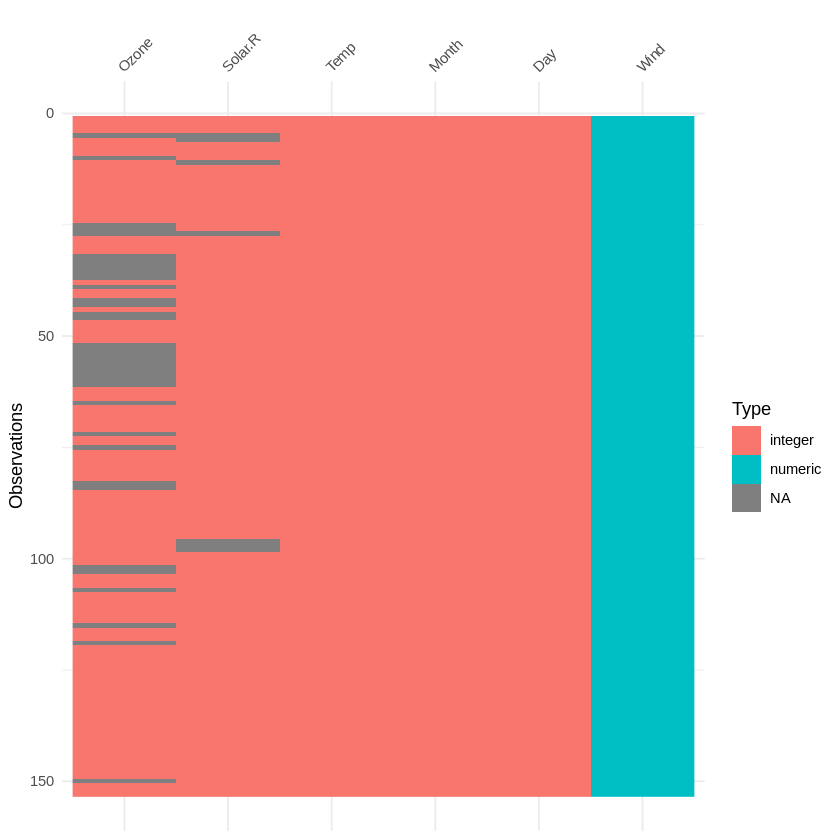

In [187]:
vis_dat(airquality)

# Determinación del **porcentaje** de datos perdidos:

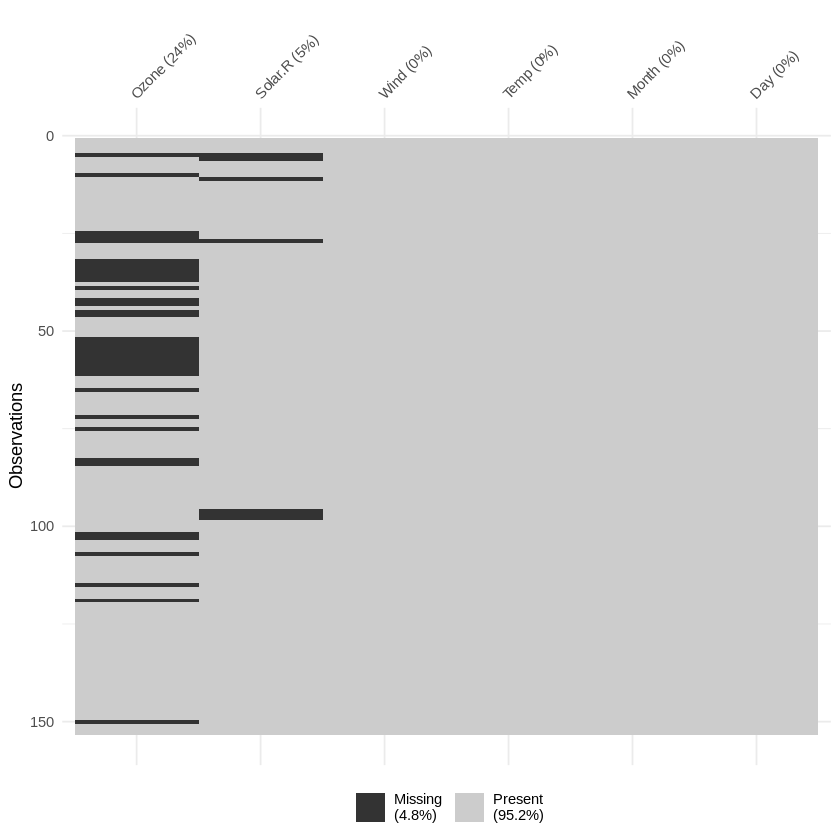

In [188]:
vis_miss(airquality ,sort_miss = TRUE)

# sort_miss = TRUE: es opcional
# con sort_miss = TRUE, ordena las columnas desde la que posea mayor pérdida de datos (cantidad de datos faltantes) a la menor.
# argumento opcional: cluster = TRUE, que permite agrupar los datos faltantes.

# cluster
Para agrupar los datos faltantes, utilizamos cruster

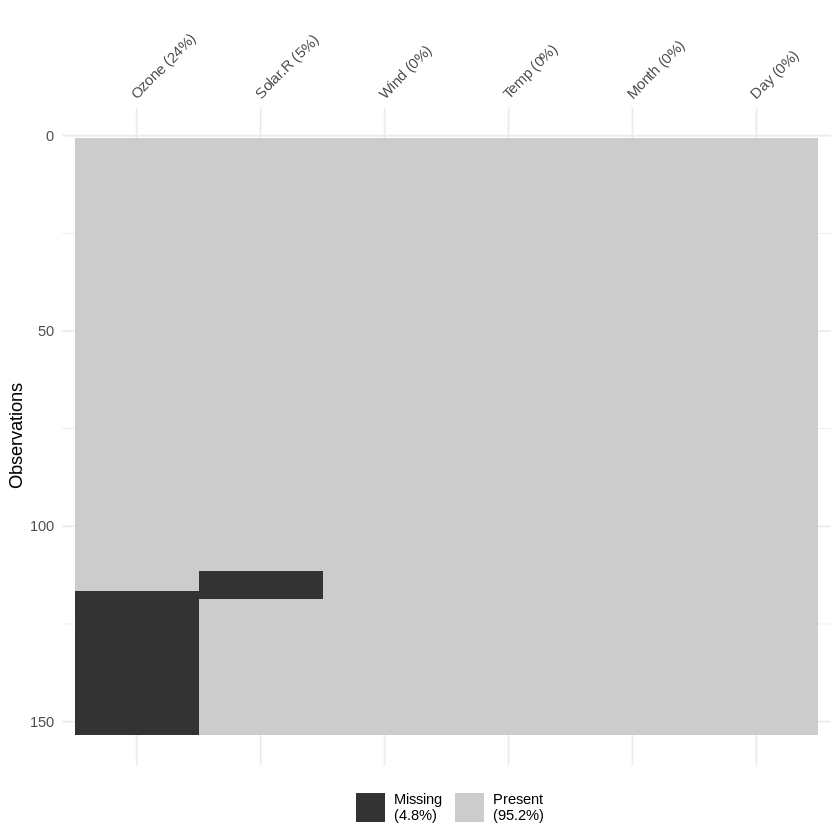

In [189]:
vis_miss(airquality ,sort_miss = TRUE, cluster = TRUE)

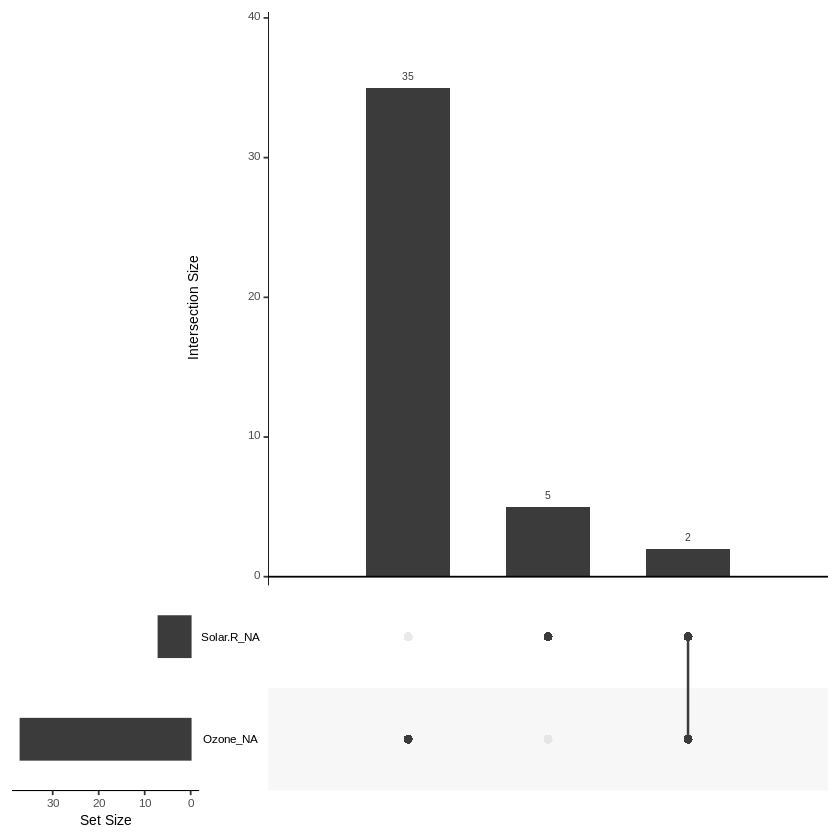

In [190]:
airquality %>% gg_miss_upset()